# Hypothesis testing:

In the EDA notebook, we explored the data to get a good understanding of the data. In this notebook, we test some of those insights by conducting hypothesis testing, A/B testing, ANOVA tests and other statistical tests.

Loading all the required libraries:

In [81]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import scikit_posthocs as sp

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import itertools

# Define the Seaborn theme
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("notebook", font_scale=1.2)

Loading the data:

In [6]:
youtube_data = pd.read_csv('..\Data\processed_youtube.csv')

youtube_data.head(5)

,title,categoryName,view_count,likes,comment_count,time_diff,day_publish,engagement,any_emoji,title_length,processed_title,description_length,processed_description,processed_tags,total_tags
0,!@#$%$#!! || Dubov vs Carlsen || Airthings Mas...,Entertainment,13.297472,10.121940,7.681099,8 days,evening,1.338829,No,57,dubov vs carlsen airthings masters,3187,follow instagram extra content http_link dubov...,"agadmator,chess,best chess channel,best youtub...",9
1,#1 76ERS at #5 HAWKS | FULL GAME HIGHLIGHTS | ...,Sports,14.288667,9.723224,8.617581,4 days,morning,1.283591,No,59,ers hawks game highlights june,874,ers hawks game highlights june trailing pts se...,"Basketball,G League,NBA,game-0042000205",4
2,#1 BUCKS at #8 HEAT | FULL GAME 4 HIGHLIGHTS |...,Sports,14.636114,10.057152,8.189522,2 days,morning,1.246688,No,61,bucks heat game highlights april,1949,miss moment latest news trending stories highl...,"Basketball,G League,NBA,game-0042200104",4
3,#1 HEAT at #2 CELTICS | FULL GAME HIGHLIGHTS |...,Sports,14.758637,10.155879,8.169903,5 days,morning,1.241699,No,59,heat celtics game highlights,475,stay uptodate news live scores stats nba app h...,"Basketball,G League,NBA,game-0042100303",4
4,#1 HEAT at #2 CELTICS | FULL GAME HIGHLIGHTS |...,Sports,14.901673,10.374584,8.299037,5 days,morning,1.253122,No,59,heat celtics game highlights,443,stay uptodate news live scores stats nba appht...,"Basketball,G League,NBA,game-0042100306",4


Checking the basic structure of the data:

In [9]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31854 entries, 0 to 31853
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  31854 non-null  object 
 1   categoryName           31854 non-null  object 
 2   view_count             31854 non-null  float64
 3   likes                  31854 non-null  float64
 4   comment_count          31854 non-null  float64
 5   time_diff              31854 non-null  object 
 6   day_publish            31854 non-null  object 
 7   engagement             31854 non-null  float64
 8   any_emoji              31854 non-null  object 
 9   title_length           31854 non-null  int64  
 10  processed_title        31831 non-null  object 
 11  description_length     31854 non-null  int64  
 12  processed_description  31140 non-null  object 
 13  processed_tags         31854 non-null  object 
 14  total_tags             31854 non-null  int64  
dtypes:

### Do different categories of videos have different engagement rate?

In the EDA section, we plotted boxplots of different video categories against likes, views and comments and noticed that there seemed that the different categories of videos had varying amount of likes,views and comments. Music videos seemed to perform the best while 'News & Politcs'videos seem to receive the least likes. Since engagemnet rate is a combination of all these 3 features, we will use engagement rate to check for significant differences between the different groups.

Inorder to test our Hypothesis, we will conduct a one-way ANOVA test with our Null Hypothesis being that there is no significant difference in engagement between the different categories of videos.

Before we can conduct our test, we will need to make sure that following assumptions are being met:
- The data is normally distributed within each video category
- The variance of the dependant variable is the same for all levels of the independant variable.
- each group/video category is independent to each other

Testing if the data is normally distributed using the Shapiro-Wilk test for each group:

In [30]:
list(youtube_data['categoryName'].unique())

['Entertainment',
 'Sports',
 'Travel & Events',
 'Pets & Animals',
 'Comedy',
 'Music',
 'Film & Animation',
 'Education',
 'People & Blogs',
 'Autos & Vehicles',
 'Gaming',
 'Howto & Style',
 'Science & Technology',
 'News & Politics']

In [31]:
engagement_rate_entertainment = youtube_data[youtube_data['categoryName'] == 'Entertainment']['engagement']
engagement_rate_gaming = youtube_data[youtube_data['categoryName'] == 'Gaming']['engagement']
engagement_rate_music = youtube_data[youtube_data['categoryName'] == 'Music']['engagement']
engagement_rate_news = youtube_data[youtube_data['categoryName'] == 'News & Politics']['engagement']
engagement_rate_people = youtube_data[youtube_data['categoryName'] == 'People & Blogs']['engagement']
engagement_rate_pets = youtube_data[youtube_data['categoryName'] == 'Pets & Animals']['engagement']
engagement_rate_science = youtube_data[youtube_data['categoryName'] == 'Science & Technology']['engagement']
engagement_rate_sports = youtube_data[youtube_data['categoryName'] == 'Sports']['engagement']
engagement_rate_travel = youtube_data[youtube_data['categoryName'] == 'Travel & Events']['engagement']
engagement_rate_film = youtube_data[youtube_data['categoryName'] == 'Film & Animation']['engagement']
engagement_rate_commedy = youtube_data[youtube_data['categoryName'] == 'Comedy']['engagement']
engagement_rate_education = youtube_data[youtube_data['categoryName'] == 'Education']['engagement']
engagement_rate_cars = youtube_data[youtube_data['categoryName'] == 'Autos & Vehicles']['engagement']
engagement_rate_style = youtube_data[youtube_data['categoryName'] == 'Howto & Style']['engagement']


video_category_data = [engagement_rate_entertainment, engagement_rate_gaming, engagement_rate_music, engagement_rate_news, engagement_rate_people, engagement_rate_pets, engagement_rate_science, engagement_rate_sports, engagement_rate_travel, engagement_rate_film, engagement_rate_commedy, engagement_rate_education, engagement_rate_cars, engagement_rate_style]

for i in video_category_data:
    if stats.shapiro(i).pvalue < 0.05:
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True


c:\Users\alvee\OneDrive\Documents\DS Project\YouTube Analysis\youtube\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since p-value for each group is less than 0.05, we can conclude that the view count data for each video category is not normally distributed. So the normality assumption is not met.

So, we will use the non-parametric Kruskal-Wallis test:

In [32]:
kw_test = stats.kruskal(*video_category_data)

kw_test

KruskalResult(statistic=6313.754170461121, pvalue=0.0)

Since p-value is less than 0.05 we can conclude that there is significant difference in the number of views across different video categories.

Next, we will perform post-hoc analysis to find which groups are different. In this case we will use Dunn's test with Bonferroni correction.

In [33]:
results = sp.posthoc_dunn(video_category_data, p_adjust='bonferroni')

significant_pairs = []
for i in range(len(video_category_data)):
    for j in range(i+1, len(video_category_data)):
        if results.iloc[i,j] < 0.05:
            significant_pairs.append((i, j))

significant_pairs

[(0, 2),
 (0, 3),
 (0, 4),
 (0, 6),
 (0, 7),
 (0, 9),
 (0, 10),
 (0, 11),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 7),
 (1, 9),
 (1, 10),
 (1, 11),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (4, 7),
 (4, 10),
 (4, 11),
 (5, 7),
 (5, 10),
 (5, 11),
 (6, 7),
 (6, 10),
 (6, 11),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (8, 10),
 (8, 11),
 (9, 10),
 (9, 12),
 (10, 11),
 (10, 12),
 (10, 13),
 (11, 12),
 (11, 13)]

Hence, we can see which pairs have different engagement rate.

### Does the length of a video title have an effect on the engagement rate?

In the EDA phase, we saw that around 10 to 25 words seem to have more views in genral than longer video titles. Instead of views, we will test if the length of a video title have an effect on the engagement rate using A/B/C test.

We will first divide the videos into three groups, one with video titles shorter than 10 words aother being between 10 to 25 words and the third group with video titles longer than 25 words. We can then compare the average engagement rate for the three groups to see if there is any significant difference.

Before we can conduct our A/B/C test, we will need to check the following assumptions similar to earlier:
- The data is normally distributed within each video category
- The variance of the dependant variable is the same for all levels of the independant variable.
- each group/video category is independent to each other

Testing if the data is normally distributed using the Shapiro-Wilk test for each group:


In [34]:
youtube_data['title_group'] = pd.cut(youtube_data['title_length'], bins=[0, 10, 25, np.inf], labels=['<10', '10-25', '>25'])

# split data into three groups based on title length
group_a = youtube_data[youtube_data['title_group'] == '<10']['engagement']
group_b = youtube_data[youtube_data['title_group'] == '10-25']['engagement']
group_c = youtube_data[youtube_data['title_group'] == '>25']['engagement']

In [37]:
groups = [group_a,group_b, group_c]

for i in groups:
    if stats.shapiro(group_a).pvalue < 0.05:
        print(True)
    else:
        print(False)

True
True
True


Since the p-value for the Shapiro Wilk test is less than 0.05, we cannot assume normality for that group and instead use  Kruskal-Wallis test.

In [38]:
# Conduct Kruskal-Wallis test
stats.kruskal(group_a, group_b, group_c)

KruskalResult(statistic=578.9493163427687, pvalue=1.9175791782894655e-126)

Since p-value of pvalue of  Kruskal-Wallis test is less than 0.05, we reject the null hypothesis that the medians of all three groups are equal, and conclude that at least one group is different from the others in terms of engagement rate.

Now we need to check which group has a significantly higher engagement rate. We can do that using pairwise Wilcoxon rank-sum tests with Bonferroni correction. This will allow us to compare the engagement rate between each pair of groups and determine which groups have a significant difference in engagement rate.

In [47]:
groups = ['<10',  '10-25', '>25']
combinations = list(itertools.combinations(groups, 2))

for comb in combinations:
    group1 = comb[0]
    group2 = comb[1]
    group1_data = youtube_data[youtube_data['title_group'] == group1]['engagement']
    group2_data = youtube_data[youtube_data['title_group'] == group2]['engagement']
    _, pval = stats.ranksums(group1_data, group2_data)
    print(f"{group1} vs {group2}: p-value = {pval:.3f}")

<10 vs 10-25: p-value = 0.071
<10 vs >25: p-value = 0.000
10-25 vs >25: p-value = 0.000


'<10' is significantly different from '>25' and '10-25' is significantly different from '>25'. We do not have enough evidence to conclude that '<10' vs '10-25' groups are significantly different.

Now we can check the mean engagement rate for the groups.

In [48]:
group_a_mean = group_a.mean()
group_b_mean = group_b.mean()
group_c_mean = group_c.mean()


print(f"Mean engagement rate for <10 words: {group_a_mean:.2f}")
print(f"Mean engagement rate for 10-25 words: {group_b_mean:.2f}")
print(f"Mean engagement rate for >25 words: {group_c_mean:.2f}")

Mean engagement rate for <10 words: 1.39
Mean engagement rate for 10-25 words: 1.39
Mean engagement rate for >25 words: 1.33


So, video titles upto 25 words will have similar engagement rate but titles longer than 25 words will tend to have lower engagement rate.

### Is there a significant relationship between video category and time of day video was posted:

In the EDA section, we saw that for most categories, the mojority of the videos were posted in the eveing except for Sports videos which had most of its videos posted either in the morning or at night. So, we will use Chi-squared test to verify if there is indeed a significant relationship between video category and time of day when the video is published.

In order to conduct a Chi-Sq test, we will need to check for the following assumptions:
- The observations should be independent of each other.
- the expected number of observations in each should be at least 5.

In [53]:
contingency_table = pd.crosstab(youtube_data['categoryName'], youtube_data['day_publish'])

expected_values = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / youtube_data.shape[0]

chi2, p_value, dof, expected =stats.chi2_contingency(contingency_table)

p_value

0.0

Since p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant relationship between video category and time of day the video is posted.

### Do certain video categories trend longer than other?

We saw in the EDA notebook that videos from 'Education', 'Howto & Style', 'People & Blogs' and 'Pets and Animals' categories trend for 6 days on average whereas videos from all the other caetgories trend for 5 days on average. So we would like to test whether certain video categories trend longer than other. 

We will try one-way ANOVA test if all assumptions are met or stick with the Kruskal-Wallis test.

In [59]:
youtube_data['time_diff'] = youtube_data['time_diff'].str.replace(' days', '').astype(int)

In [62]:
engagement_rate_entertainment = youtube_data[youtube_data['categoryName'] == 'Entertainment']['time_diff']
engagement_rate_gaming = youtube_data[youtube_data['categoryName'] == 'Gaming']['time_diff']
engagement_rate_music = youtube_data[youtube_data['categoryName'] == 'Music']['time_diff']
engagement_rate_news = youtube_data[youtube_data['categoryName'] == 'News & Politics']['time_diff']
engagement_rate_people = youtube_data[youtube_data['categoryName'] == 'People & Blogs']['time_diff']
engagement_rate_pets = youtube_data[youtube_data['categoryName'] == 'Pets & Animals']['time_diff']
engagement_rate_science = youtube_data[youtube_data['categoryName'] == 'Science & Technology']['time_diff']
engagement_rate_sports = youtube_data[youtube_data['categoryName'] == 'Sports']['time_diff']
engagement_rate_travel = youtube_data[youtube_data['categoryName'] == 'Travel & Events']['time_diff']
engagement_rate_film = youtube_data[youtube_data['categoryName'] == 'Film & Animation']['time_diff']
engagement_rate_commedy = youtube_data[youtube_data['categoryName'] == 'Comedy']['time_diff']
engagement_rate_education = youtube_data[youtube_data['categoryName'] == 'Education']['time_diff']
engagement_rate_cars = youtube_data[youtube_data['categoryName'] == 'Autos & Vehicles']['time_diff']
engagement_rate_style = youtube_data[youtube_data['categoryName'] == 'Howto & Style']['time_diff']


video_category_data = [engagement_rate_entertainment, engagement_rate_gaming, engagement_rate_music, engagement_rate_news, engagement_rate_people, engagement_rate_pets, engagement_rate_science, engagement_rate_sports, engagement_rate_travel, engagement_rate_film, engagement_rate_commedy, engagement_rate_education, engagement_rate_cars, engagement_rate_style]

for i in video_category_data:
    if stats.shapiro(i).pvalue < 0.05:
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True


c:\Users\alvee\OneDrive\Documents\DS Project\YouTube Analysis\youtube\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the normality test failed, we will use Kruskal-Wallis test.

In [63]:
kw_test = stats.kruskal(*video_category_data)

kw_test

KruskalResult(statistic=790.4859717225423, pvalue=1.505760626440869e-160)

Since p-value is less than 0.05 we can conclude that there is significant difference in the number of days a video trends for across different video categories.

### What is the optimal number of tags that has the highest engagement rate?

We will start by visualizing our data:

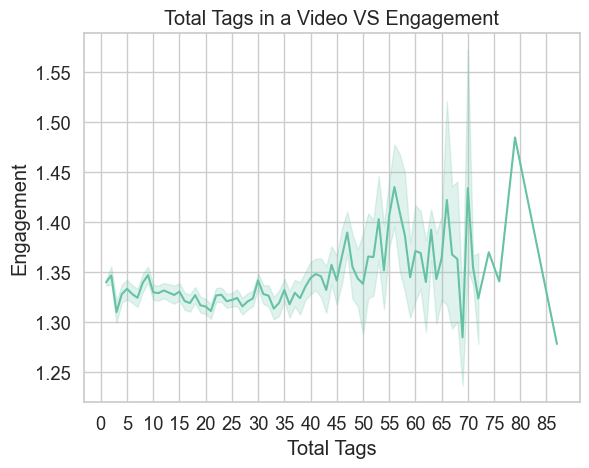

In [72]:
sns.lineplot(data=youtube_data, x = 'total_tags', y = 'engagement')

plt.title("Total Tags in a Video VS Engagement")
plt.xlabel("Total Tags")
plt.ylabel("Engagement")

plt.xticks(range(0, 90, 5))

plt.show()

Around 40 to 55 tags seem like a good option.

In [73]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31854 entries, 0 to 31853
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   title                  31854 non-null  object  
 1   categoryName           31854 non-null  object  
 2   view_count             31854 non-null  float64 
 3   likes                  31854 non-null  float64 
 4   comment_count          31854 non-null  float64 
 5   time_diff              31854 non-null  int32   
 6   day_publish            31854 non-null  object  
 7   engagement             31854 non-null  float64 
 8   any_emoji              31854 non-null  object  
 9   title_length           31854 non-null  int64   
 10  processed_title        31831 non-null  object  
 11  description_length     31854 non-null  int64   
 12  processed_description  31140 non-null  object  
 13  processed_tags         31854 non-null  object  
 14  total_tags             31854 non-null 

## Regression Analysis to determine the factors that impact the engagement of a video:

We will need to make sure certain assumptions are met first. We will include the following features in our analysis:
- categoryName
- day_publish
- any_emoji
- title_length
- description_length
- total_tags

In [145]:
regression_df = youtube_data[['engagement', 'categoryName', 'day_publish','any_emoji', 'description_length', 'title_length','total_tags']]

# Convert categorical variables to dummy variables
regression_df = pd.get_dummies(regression_df, columns=['categoryName', 'day_publish', 'any_emoji'],dtype=float, drop_first=False)

X = regression_df.drop('engagement', axis=1)
y = regression_df['engagement']

Now we will fit the linear regression model:

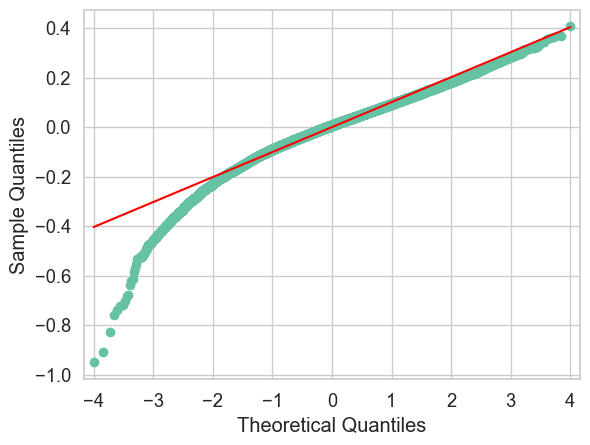

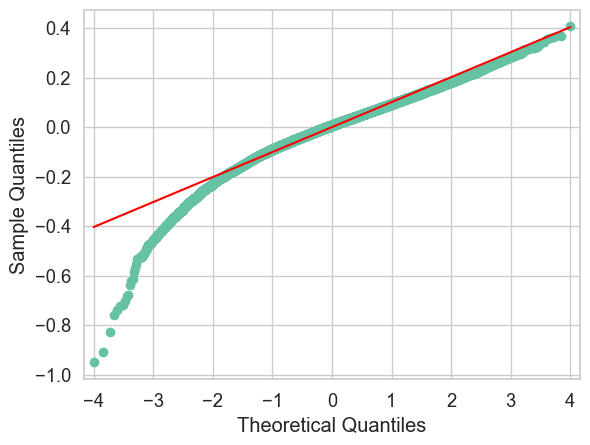

In [146]:
reg_model = sm.OLS(y, sm.add_constant(X)).fit()

# Check for normality of residuals using Q-Q plot
sm.qqplot(reg_model.resid, line='s')

Checking for homoscedasticity:

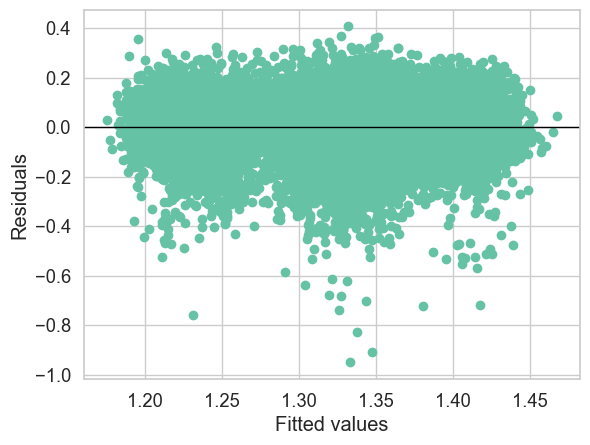

In [147]:
pred_val = reg_model.fittedvalues.copy()
residual = y - pred_val
plt.scatter(pred_val, residual)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linewidth=1)

plt.show()

In [148]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             engagement   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     474.0
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        08:13:08   Log-Likelihood:                 27842.
No. Observations:               31854   AIC:                        -5.564e+04
Df Residuals:                   31834   BIC:                        -5.548e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.7144      0.001    576.350      0.000       0.712       0.717
description_length                 8.382e-06   6.81e-07     12.307      0.000    7.05e-06    9.72e-06
title_length                         -0.0009   3.12e-05    -29.555      0.000      -0.001      -0.001
total_tags                            0.0002   4.79e-05      3.208      0.001    5.97e-05       0.000
categoryName_Autos & Vehicles         0.0557      0.003     16.231      0.000       0.049       0.062
categoryName_Comedy                   0.0986      0.003     38.227      0.000       0.094       0.104
categoryName_Education                0.0717      0.003     22.834      0.000       0.066       0.078
categoryName_Entertainment            0.0459      0.001     30.694      0.000       0.043       0.049
categoryName_Film & Animation         0.0624      0.003     20.584      0.000       0.056       0.068
categoryName_Gaming                   0.0538      0.001     36.382      0.000       0.051       0.057
categoryName_Howto & Style            0.0535      0.003     17.528      0.000       0.048       0.060
categoryName_Music                    0.1227      0.002     66.564      0.000       0.119       0.126
categoryName_News & Politics         -0.0242      0.003     -7.756      0.000      -0.030      -0.018
categoryName_People & Blogs           0.0656      0.002     32.642      0.000       0.062       0.070
categoryName_Pets & Animals           0.0505      0.007      6.988      0.000       0.036       0.065
categoryName_Science & Technology     0.0512      0.003     17.268      0.000       0.045       0.057
categoryName_Sports                  -0.0322      0.002    -17.742      0.000      -0.036      -0.029
categoryName_Travel & Events          0.0390      0.006      6.697      0.000       0.028       0.050
day_publish_evening                   0.2435      0.001    285.705      0.000       0.242       0.245
day_publish_morning                   0.2299      0.001    231.442      0.000       0.228       0.232
day_publish_night                     0.2410      0.001    252.880      0.000       0.239       0.243
any_emoji_No                          0.3646      0.001    302.818      0.000       0.362       0.367
any_emoji_Yes                         0.3499      0.002    188.544      0.000       0.346       0.354
==============================================================================
Omnibus:                     4174.216   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11377.008
Skew:                          -0.725   Prob(JB):                         0.00
Kurtosis:                       5.543   Cond. No.                     5.64e+18
====================================

-  Description length, title length, total tags, and various category names have significant positive coefficients, indicating that these factors increase engagement
- Day of publishing and the presence of emojis also have significant positive coefficients
- "News & Politics" and "Sports" category names have significant negative coefficients, meaning that videos in these categories have lower engagement
- the model has an R-squared of 0.221, indicating that 22.1% of the variance in the dependent variable (engagement) can be explained by the independent variables
- The F-statistic is 474 with a significant probability value (p-value) of 0.00, indicating that the model is statistically significant

There seem to be some issues with multicolinearity.